In [20]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf

## Data Implement

In [21]:
mushrooms = pd.read_csv('mushroom.csv') 
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Label Encoding

In [22]:
labelencoder=LabelEncoder() 
for col in mushrooms.columns: 
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col]) 
mushrooms.head()



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Data Processing

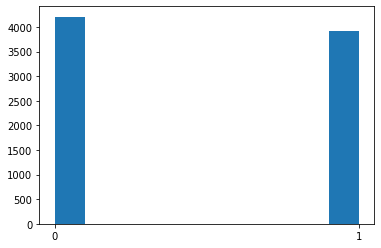

In [23]:
y = mushrooms['class'].values 
x = mushrooms.drop(['class'], axis=1) 
x = x.values 
x = (x - x.min()) / (x.max() - x.min())

plt.hist(y) 
plt.xticks([0, 1]) 
plt.show()

## Train & Test Dataset Split

In [30]:
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42) 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(x_train.shape, y_train.shape, y_train.shape, y_test.shape)

(6499, 22) (6499, 2) (6499, 2) (1625, 2)


## Modeling

In [32]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(22,)), 
    tf.keras.layers.Dense(units=24, activation='relu'), 
    tf.keras.layers.Dense(units=12, activation='relu'), 
    tf.keras.layers.Dense(units=2, activation='sigmoid') ]) 

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                1104      
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,606
Trainable params: 2,606
Non-trainable params: 0
_________________________________________________________________


## Training Model

In [33]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


Train on 4874 samples, validate on 1625 samples
Epoch 1/25
4874/4874 [==============================] - 1s 284us/sample - loss: 0.2597 - accuracy: 0.8907 - val_loss: 0.1397 - val_accuracy: 0.9437
Epoch 2/25
4874/4874 [==============================] - 0s 28us/sample - loss: 0.1334 - accuracy: 0.9483 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 3/25
4874/4874 [==============================] - 0s 29us/sample - loss: 0.0681 - accuracy: 0.9735 - val_loss: 0.0391 - val_accuracy: 0.9831
Epoch 4/25
4874/4874 [==============================] - 0s 29us/sample - loss: 0.0395 - accuracy: 0.9855 - val_loss: 0.0096 - val_accuracy: 0.9975
Epoch 5/25
4874/4874 [==============================] - 0s 29us/sample - loss: 0.0337 - accuracy: 0.9886 - val_loss: 0.0211 - val_accuracy: 0.9905
Epoch 6/25
4874/4874 [==============================] - 0s 29us/sample - loss: 0.0384 - accuracy: 0.9889 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 7/25
4874/4874 [==============================] - 0s 30us/sampl